In [ ]:
1. Univariate Exploration

Crime type distribution (bar plot)

Outcome category distribution (bar plot)

Top 20 locations (bar plot)

Top 20 LSOAs (bar plot)

2. Time Series Analysis

Monthly total crime trend (bar plot with zoomable y-axis)

Monthly trend by crime type (optional)

Rolling average (3-month, optional)

3. Outcome Analysis

Crime type × Outcome heatmap (optional)

Outcome % by crime type (optional)

Outcome trends over time (optional)

4. Spatial Summary (non-map)

Scatter plot of lat/lon by crime type

Top LSOAs by crime count

Hexbin / KDE plot (optional)

5. Aggregated Tables for Reporting

Crimes per LSOA

Crimes per month, per type

Outcome rates per LSOA or crime type

Export summary tables for Power BI (optional)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data CSV (adjust the path as needed)
file_path = '/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv'
df = pd.read_csv(file_path)

In [2]:
import pandas as pd
from IPython.display import display

# Load your DataFrame (example path)
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Display the first 5 rows as a table
display(df.head())

,crime_id,month,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category
0,7c903b55af24fe6dab7eb96fe696f8e7d57e05817f6730...,2024-06-01,-2.746819,53.389101,On or near Further/Higher Educational Building,E01012393,Halton 001B,Drugs,Local resolution
1,461fe1ff825ef4cc740dafe58e9015449696d80978580a...,2024-06-01,-2.798814,53.354705,On or near Old Higher Road,E01012391,Halton 008B,Criminal damage and arson,Investigation complete; no suspect identified
2,ASB_FILL,2024-06-01,-2.871827,53.489763,On or near Gilescroft Avenue,E01006448,Knowsley 001A,Anti-social behaviour,ASB_FILL
3,ebeec31356de0e9219711d81f3d8006d33c275e04e9e7a...,2024-06-01,-2.871229,53.489300,On or near Watts Close,E01006448,Knowsley 001A,Criminal damage and arson,Investigation complete; no suspect identified
4,b04da555d9c4f211ce48bf6453dc0f6257c63785727ec6...,2024-06-01,-2.871827,53.489763,On or near Gilescroft Avenue,E01006448,Knowsley 001A,Criminal damage and arson,Unable to prosecute suspect


/var/folders/gn/c_sb1q453nl00mmq3nrdxfp40000gn/T/ipykernel_43603/3446310807.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette='pastel', edgecolor='black', linewidth=0.5)


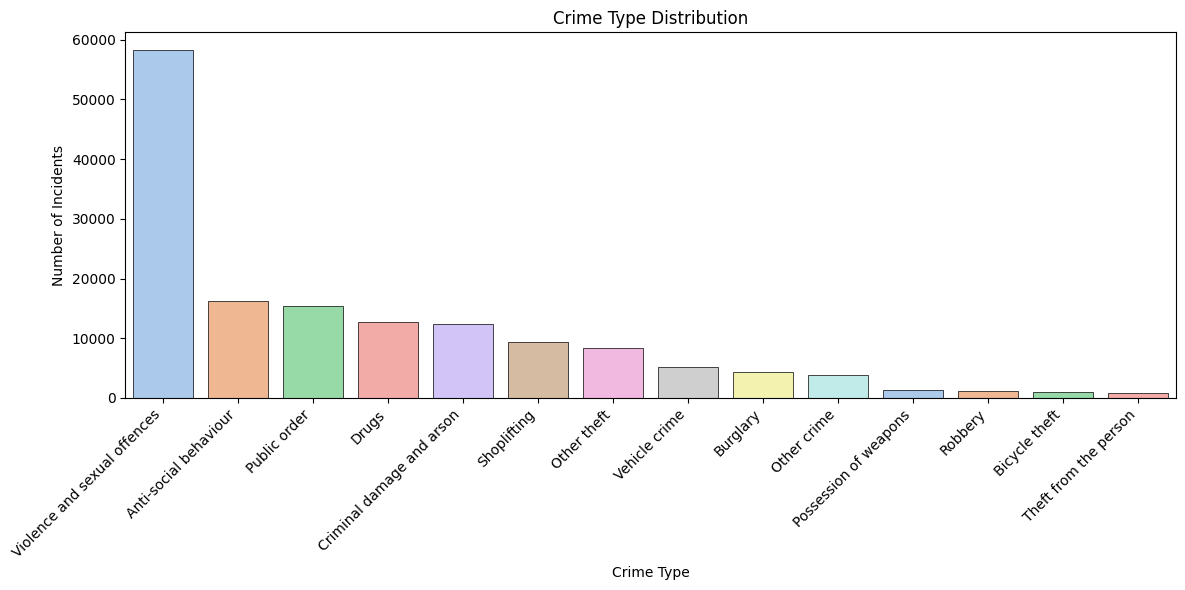

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each crime type
crime_type_counts = df['crime_type'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values, palette='pastel', edgecolor='black', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Crime Type Distribution')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.tight_layout()

# Save the figure
output_path = '/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/crime_type_distribution.png'
plt.savefig(output_path, dpi=300)

# Show plot
plt.show()

/var/folders/gn/c_sb1q453nl00mmq3nrdxfp40000gn/T/ipykernel_43603/4001782263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='pastel',edgecolor='black', linewidth=0.5)


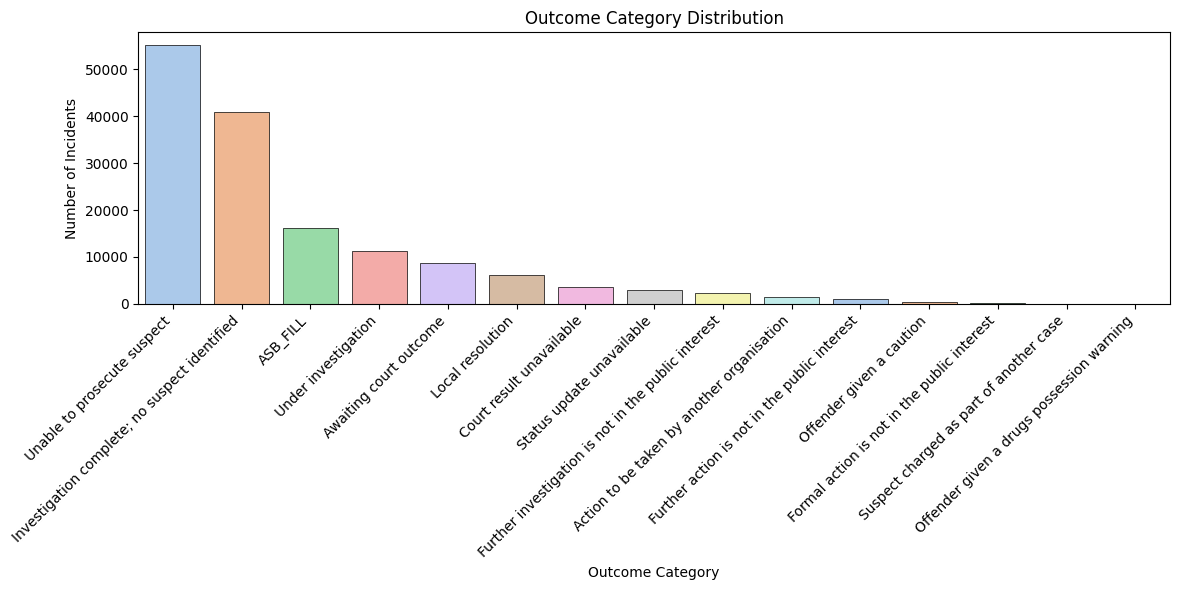

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each outcome category and sort descending
outcome_counts = df['last_outcome_category'].value_counts().sort_values(ascending=False)

# Plot the counts as a bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='pastel',edgecolor='black', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Outcome Category Distribution')
plt.xlabel('Outcome Category')
plt.ylabel('Number of Incidents')
plt.tight_layout()

# Save the plot
output_path = '/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/outcome_category_distribution.png'
plt.savefig(output_path, dpi=300)

# Show the plot
plt.show()

/var/folders/gn/c_sb1q453nl00mmq3nrdxfp40000gn/T/ipykernel_43603/2817819316.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='pastel',edgecolor='black', linewidth=0.3)


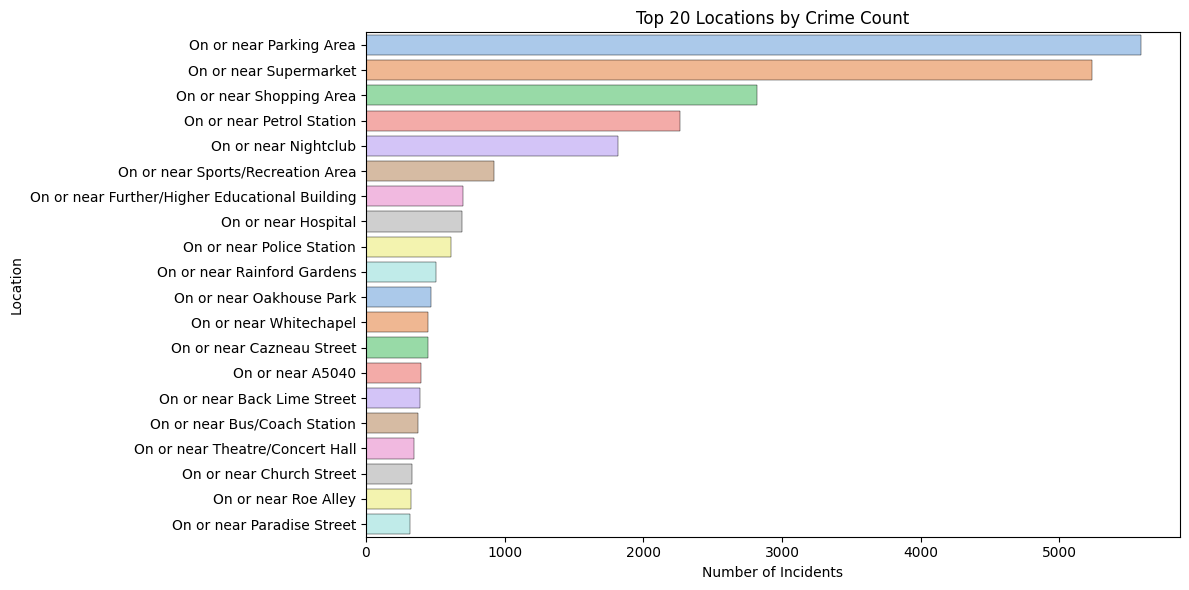

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 20 locations
top_locations = df['location'].value_counts().head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='pastel',edgecolor='black', linewidth=0.3)
plt.title('Top 20 Locations by Crime Count')
plt.xlabel('Number of Incidents')
plt.ylabel('Location')
plt.tight_layout()

plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/top_20_locations.png')
plt.show()

/var/folders/gn/c_sb1q453nl00mmq3nrdxfp40000gn/T/ipykernel_43603/3381129849.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lsoas.values, y=top_lsoas.index, palette='pastel', edgecolor='black', linewidth=0.3)


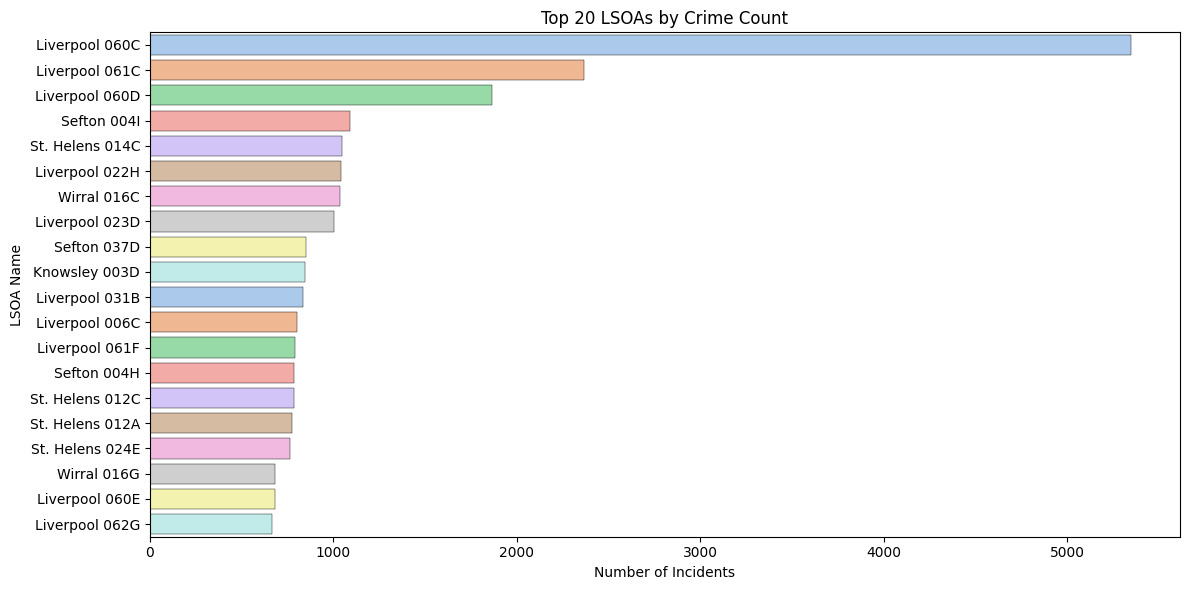

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 20 LSOAs
top_lsoas = df['lsoa_name'].value_counts().head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_lsoas.values, y=top_lsoas.index, palette='pastel', edgecolor='black', linewidth=0.3)
plt.title('Top 20 LSOAs by Crime Count')
plt.xlabel('Number of Incidents')
plt.ylabel('LSOA Name')
plt.tight_layout()

# Save the plot
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/top_20_lsoas.png')
plt.show()

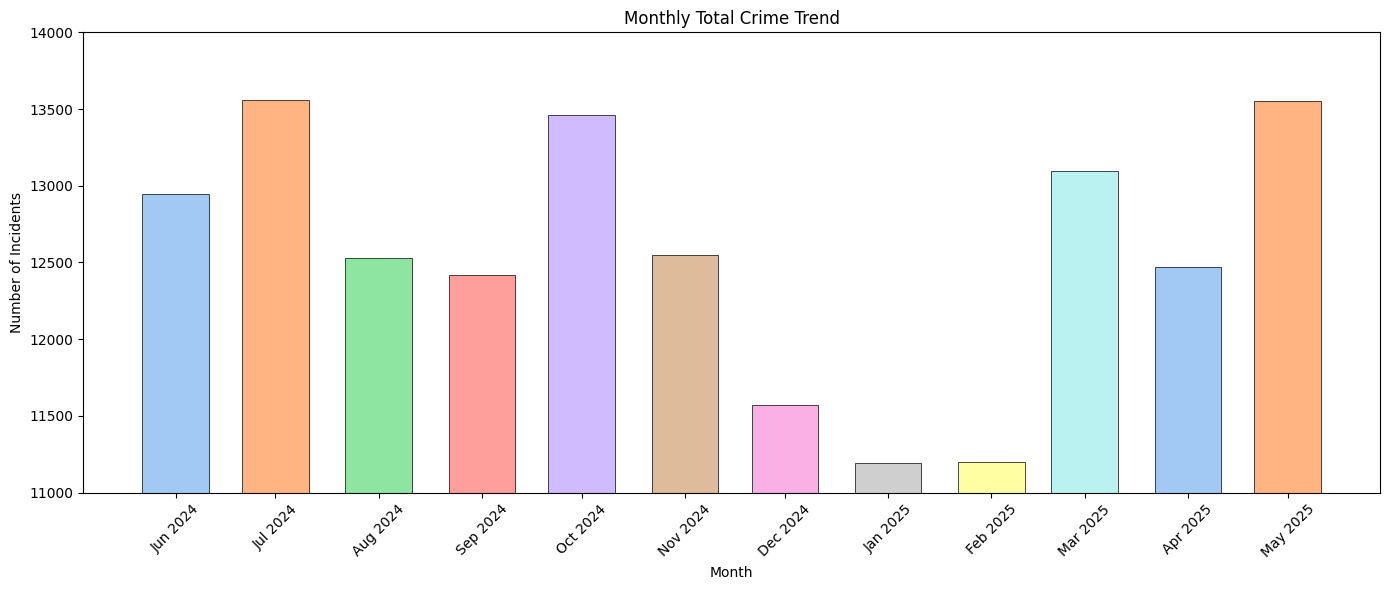

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Group crimes by month, get counts
monthly_crime = df.groupby('month').size()

# Ensure datetime index
monthly_crime.index = pd.to_datetime(monthly_crime.index)

# Generate pastel palette with one color per bar
palette = sns.color_palette('pastel', len(monthly_crime))

# Convert datetime index to matplotlib dates
dates = mdates.date2num(monthly_crime.index.to_pydatetime())

fig, ax = plt.subplots(figsize=(14,6))

bar_width = 20  # width in days

# Plot each bar with its own pastel color
for i, (date, count) in enumerate(zip(dates, monthly_crime.values)):
    ax.bar(date, count, width=bar_width, color=palette[i], align='center',edgecolor='black', linewidth=0.5,)

# Format x-axis ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents')
ax.set_title('Monthly Total Crime Trend')

# Set y-axis zoom range (adjust if you want)
ax.set_ylim(11000, 14000)

plt.tight_layout()

# Save the plot
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/monthly_crime_trend.png')

plt.show()

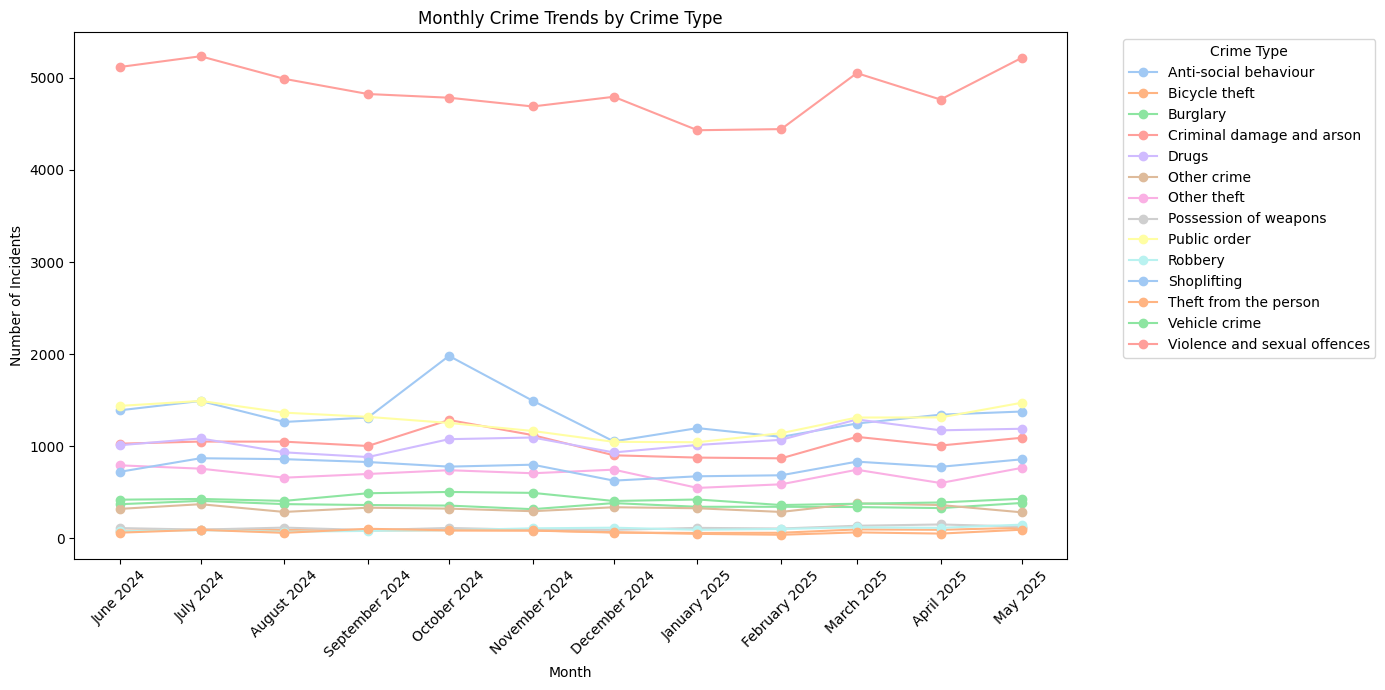

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and cleaned, with 'month' as datetime and 'crime_type' columns present

# 1. Group data by month and crime_type, count incidents
monthly_by_crime = df.groupby(['month', 'crime_type']).size().reset_index(name='count')

# 2. Pivot the data to get months as rows and crime types as columns
monthly_pivot = monthly_by_crime.pivot(index='month', columns='crime_type', values='count').fillna(0)

# 3. Ensure the index is datetime
monthly_pivot.index = pd.to_datetime(monthly_pivot.index)

# 4. Plot setup
plt.figure(figsize=(14, 7))
sns.set_palette('pastel')  # Use pastel palette for lines

# 5. Plot each crime type's monthly trend line
for crime_type in monthly_pivot.columns:
    plt.plot(monthly_pivot.index, monthly_pivot[crime_type], marker='o', label=crime_type)

# 6. Titles and labels
plt.title('Monthly Crime Trends by Crime Type')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')

# 7. Format x-axis labels as 'June 2024', etc.
month_labels = monthly_pivot.index.strftime('%B %Y')
plt.xticks(ticks=monthly_pivot.index, labels=month_labels, rotation=45)

# 8. Legend outside the plot
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# 9. Save the figure
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/monthly_trend_by_crime_type.png')

# 10. Show the plot
plt.show()

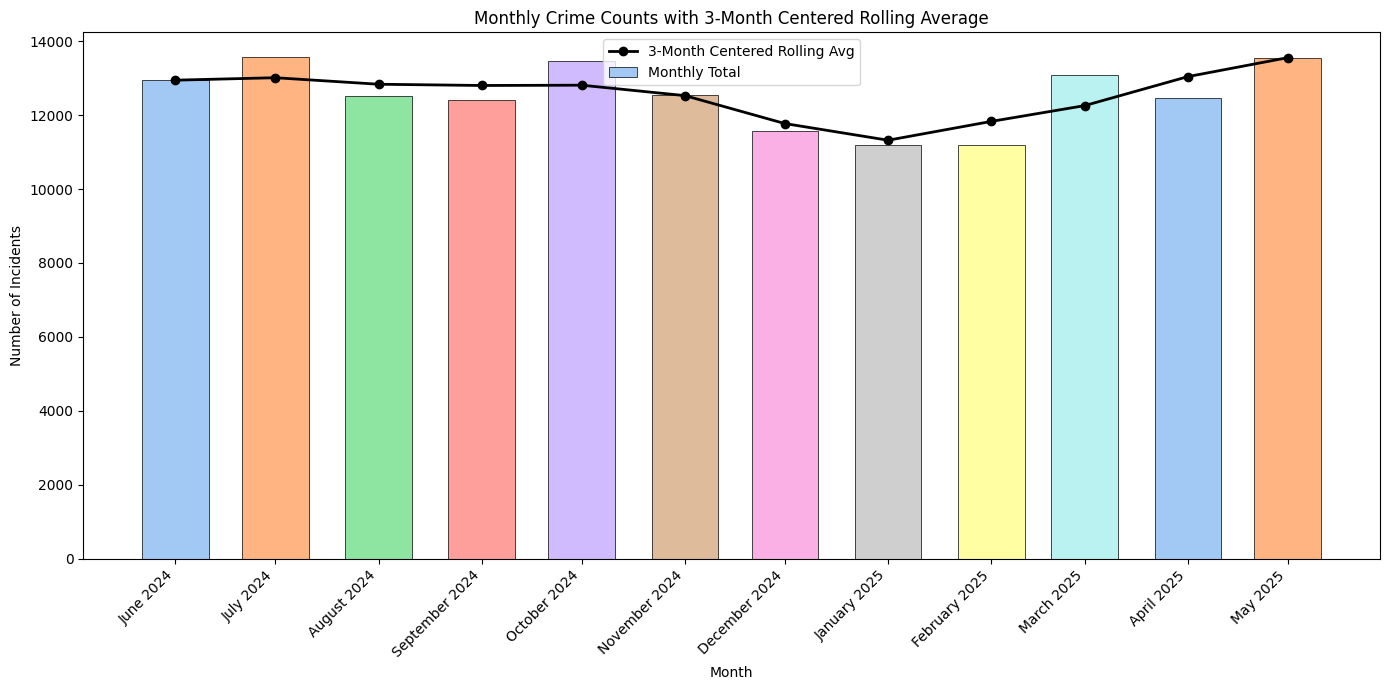

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Assuming df is loaded and cleaned, 'month' is datetime-like or string

# 1. Aggregate total crime counts per month
monthly_total = df.groupby('month').size().sort_index()

# 2. Convert index to datetime (important)
monthly_total.index = pd.to_datetime(monthly_total.index)

# 3. Compute centered 3-month rolling average
rolling_avg = monthly_total.rolling(window=3, center=True).mean()

# 4. Replace NaN at edges of rolling_avg with actual data points
if pd.isna(rolling_avg.iloc[0]):
    rolling_avg.iloc[0] = monthly_total.iloc[0]
if pd.isna(rolling_avg.iloc[-1]):
    rolling_avg.iloc[-1] = monthly_total.iloc[-1]

# 5. Plot setup
plt.figure(figsize=(14,7))
palette = sns.color_palette('pastel', n_colors=len(monthly_total))  # get enough colors

# 6. Convert datetime index to matplotlib dates for bar plotting
dates = mdates.date2num(monthly_total.index)

# 7. Plot bar chart of monthly totals with pastel colors for each bar
plt.bar(dates, monthly_total.values, width=20, color=palette, align='center', edgecolor='black', linewidth=0.5, label='Monthly Total')
# 8. Overlay rolling average line in dark grey
plt.plot(monthly_total.index, rolling_avg, color='black', marker='o', linewidth=2, label='3-Month Centered Rolling Avg')

# 9. Format x-axis labels as 'June 2024' etc.
month_labels = monthly_total.index.strftime('%B %Y')
plt.xticks(ticks=monthly_total.index, labels=month_labels, rotation=45, ha='right')

# 10. Labels and title
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Monthly Crime Counts with 3-Month Centered Rolling Average')

# 11. Legend
plt.legend()

# 12. Tight layout
plt.tight_layout()

# 13. Save figure
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/monthly_crime_rolling_avg.png')

# 14. Show plot
plt.show()


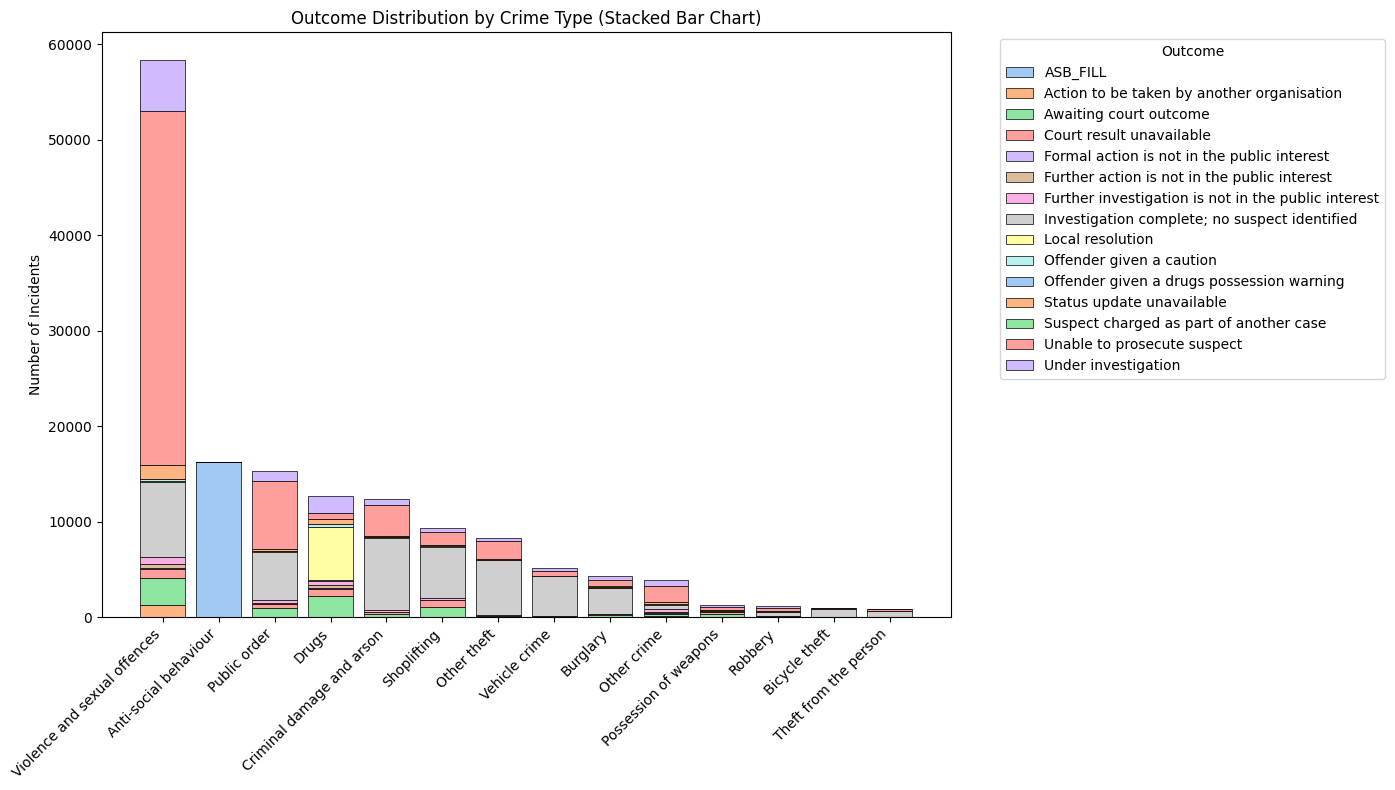

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by crime type and outcome category
outcome_by_crime = df.groupby(['crime_type', 'last_outcome_category']).size().unstack(fill_value=0)

# 2. Sort crime types by total occurrences
outcome_by_crime = outcome_by_crime.loc[outcome_by_crime.sum(axis=1).sort_values(ascending=False).index]

# 3. Plot setup
plt.figure(figsize=(14, 8))
bottom = None
colors = sns.color_palette("pastel", n_colors=outcome_by_crime.shape[1])

# 4. Create stacked bars
for i, outcome in enumerate(outcome_by_crime.columns):
    if bottom is None:
        bars = plt.bar(outcome_by_crime.index, outcome_by_crime[outcome], label=outcome, color=colors[i], edgecolor='black', linewidth=0.5)
        bottom = outcome_by_crime[outcome].copy()
    else:
        plt.bar(outcome_by_crime.index, outcome_by_crime[outcome], bottom=bottom, label=outcome, color=colors[i], edgecolor='black', linewidth=0.5)
        bottom += outcome_by_crime[outcome]

# 5. Final touches
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Incidents')
plt.title('Outcome Distribution by Crime Type (Stacked Bar Chart)')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 6. Save figure
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/stacked_outcome_by_crime_type.png')

# 7. Show plot
plt.show()


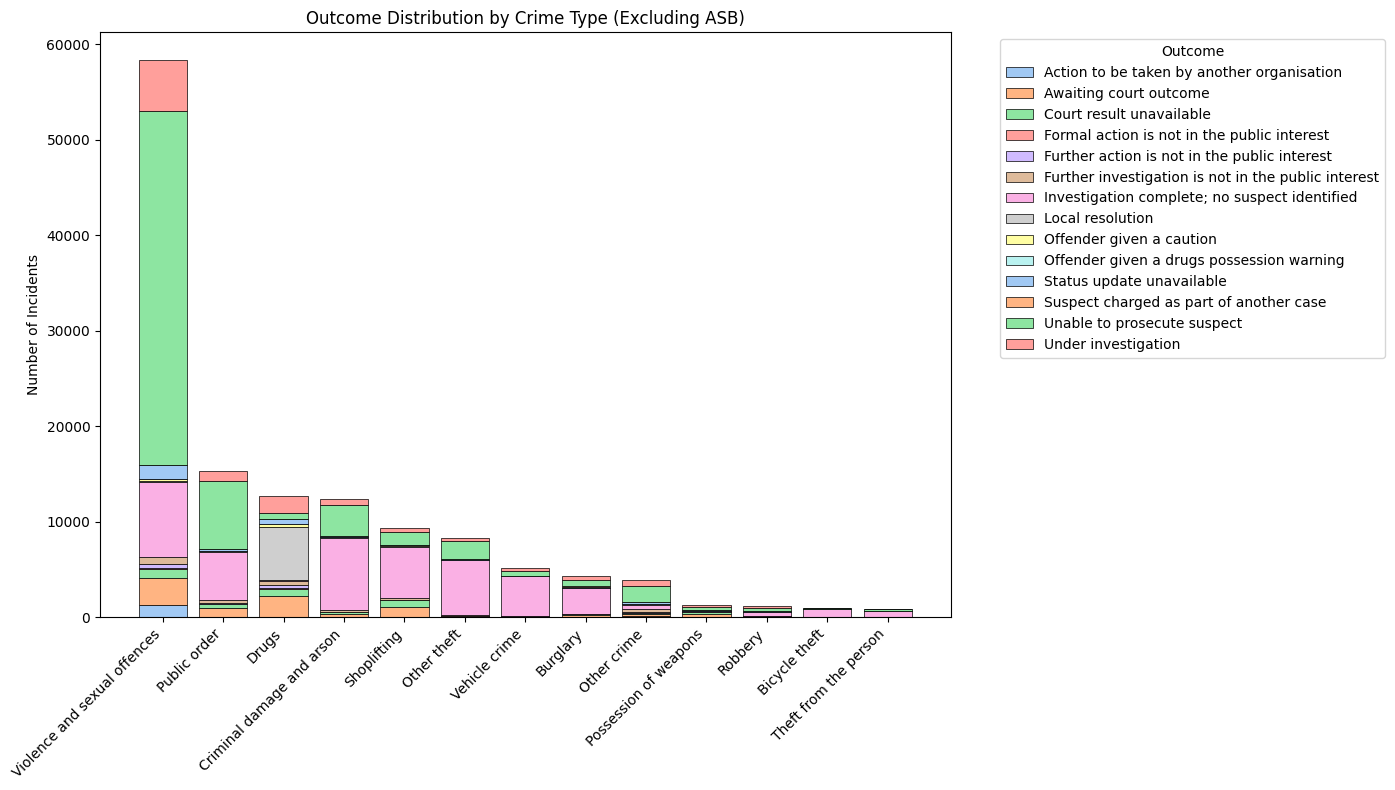

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exclude 'Anti-social behaviour' from the analysis as no outcome information available
df_filtered = df[df['crime_type'] != 'Anti-social behaviour']  # ASB often lacks outcome data

# 2. Group by crime type and outcome category
outcome_by_crime = df_filtered.groupby(['crime_type', 'last_outcome_category']).size().unstack(fill_value=0)

# 3. Sort crime types by total occurrences
outcome_by_crime = outcome_by_crime.loc[outcome_by_crime.sum(axis=1).sort_values(ascending=False).index]

# 4. Plot setup
plt.figure(figsize=(14, 8))
bottom = None
colors = sns.color_palette("pastel", n_colors=outcome_by_crime.shape[1])

# 5. Create stacked bars
for i, outcome in enumerate(outcome_by_crime.columns):
    if bottom is None:
        bars = plt.bar(outcome_by_crime.index, outcome_by_crime[outcome], label=outcome, color=colors[i], edgecolor='black', linewidth=0.5)
        bottom = outcome_by_crime[outcome].copy()
    else:
        plt.bar(outcome_by_crime.index, outcome_by_crime[outcome], bottom=bottom, label=outcome, color=colors[i], edgecolor='black', linewidth=0.5)
        bottom += outcome_by_crime[outcome]

# 6. Final touches
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Incidents')
plt.title('Outcome Distribution by Crime Type (Excluding ASB)')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 7. Save figure
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/stacked_outcome_by_crime_type_excl_asb.png')

# 8. Show plot
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm

# Assuming df_filtered and outcome_crime_pivot are prepared as before

plt.figure(figsize=(14,8))

sns.heatmap(
    outcome_crime_pivot,
    annot=True,                    # Show counts
    fmt='d',                      # Integer format for annotations
    cmap='YlOrRd',                # Yellow->Orange->Red color palette
    norm=LogNorm(vmin=1),         # Log scale color normalization without vmax cap
    cbar_kws={'label': 'Count (log scale)'}
)

plt.title('Crime Type vs Outcome Category Heatmap (Logarithmic Color Scale)')
plt.ylabel('Crime Type')
plt.xlabel('Outcome Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/crime_outcome_heatmap_logscale.png', dpi=300)
plt.show()

NameError: name 'outcome_crime_pivot' is not defined

<Figure size 1400x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Top 7 outcomes by total count
top_outcomes = df['last_outcome_category'].value_counts().nlargest(7).index

# Filter data
df_top_outcomes = df[df['last_outcome_category'].isin(top_outcomes)]

# Group and pivot
monthly_outcome_counts = df_top_outcomes.groupby(['month', 'last_outcome_category']).size().unstack(fill_value=0)

# Ensure datetime and sort
monthly_outcome_counts.index = pd.to_datetime(monthly_outcome_counts.index)
monthly_outcome_counts = monthly_outcome_counts.sort_index()

# Prepare explicit month labels from June 2024 to May 2025
month_range = pd.date_range(start='2024-06-01', end='2025-05-01', freq='MS')
month_labels = month_range.strftime('%B %Y')

# Plot
plt.figure(figsize=(14,7))
for outcome in monthly_outcome_counts.columns:
    plt.plot(monthly_outcome_counts.index, monthly_outcome_counts[outcome], marker='o', label=outcome)

plt.title('Monthly Crime Outcome Trends (Top 7 Outcomes)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')

# Set x-axis ticks and labels explicitly
plt.xticks(ticks=month_range, labels=month_labels, rotation=45)

plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
# List all unique outcome categories and their counts
outcome_counts = df['last_outcome_category'].value_counts(dropna=False)
print(outcome_counts)


In [ ]:
df['month'] = pd.to_datetime(df['month'])

print("Outcomes before Jan 2025:")
print(df[df['month'] < '2025-01-01']['last_outcome_category'].value_counts())

print("\nOutcomes from Jan 2025 onwards:")
print(df[df['month'] >= '2025-01-01']['last_outcome_category'].value_counts())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'month' column is datetime
df['month'] = pd.to_datetime(df['month'])

# Group by month and outcome category, count incidents
monthly_outcome = df.groupby(['month', 'last_outcome_category']).size().reset_index(name='count')

# Pivot data to have months as rows and outcomes as columns
monthly_outcome_pivot = monthly_outcome.pivot(index='month', columns='last_outcome_category', values='count').fillna(0)

# Sort the columns by total counts descending for better plotting order
monthly_outcome_pivot = monthly_outcome_pivot.loc[:, monthly_outcome_pivot.sum(axis=0).sort_values(ascending=False).index]

# Plot
plt.figure(figsize=(16, 8))
sns.set_palette('pastel')

for outcome in monthly_outcome_pivot.columns:
    plt.plot(monthly_outcome_pivot.index, monthly_outcome_pivot[outcome], marker='o', label=outcome)

# Format x-axis labels as 'Jun 2024', etc.
month_labels = monthly_outcome_pivot.index.strftime('%b %Y')
plt.xticks(ticks=monthly_outcome_pivot.index, labels=month_labels, rotation=45)

plt.title('Monthly Crime Outcomes Over Time (All Outcome Categories)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Outcome Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/monthly_outcome_all_categories.png', dpi=300)

plt.show()


In [ ]:
# Outcome categories shifted starting January 2025.
# Previously, ongoing investigations were often logged under categories like:
#  - 'Unable to prosecute suspect'
#  - 'Awaiting court outcome'
#  - 'Status update unavailable' (now discontinued)
# From January 2025 onward, ongoing investigations are primarily labeled as:
#  - 'Under investigation'
# This reclassification means:
#  - The total crime count remains relatively flat over time,
#    but individual outcome category trends reflect changes in labeling rather than actual case volume changes.

In [ ]:
pip install geopandas

/var/folders/gn/c_sb1q453nl00mmq3nrdxfp40000gn/T/ipykernel_43603/1464399366.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(crime_types))


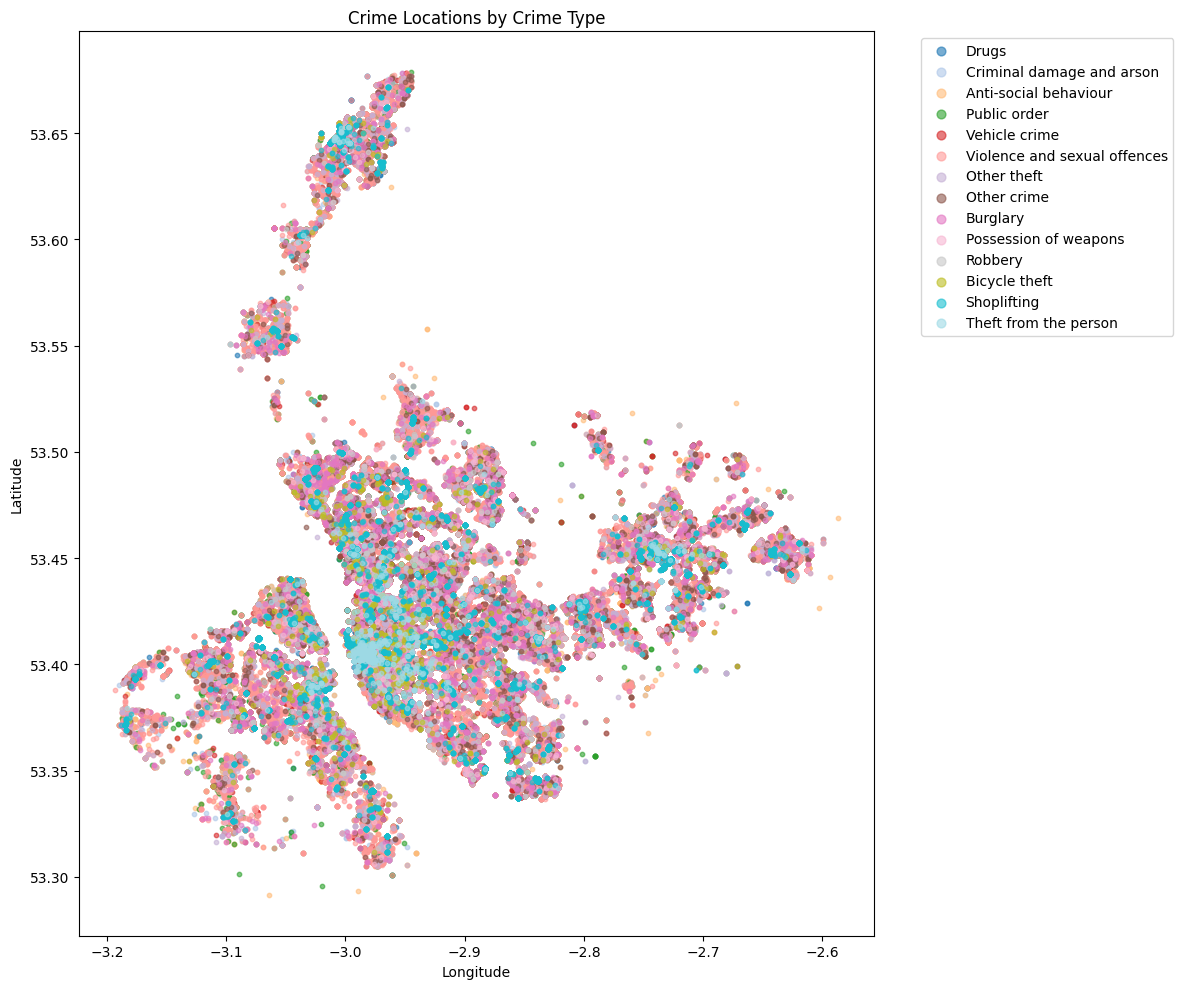

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load your DataFrame (adjust path if needed)
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Convert DataFrame to GeoDataFrame with geometry points
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Load a base map shapefile for Liverpool area or the broader region
# You can use a simple boundary file if you have one
# Example: boundary = gpd.read_file('/path/to/liverpool_boundary.shp')
# For now, let's just plot the points on an empty coordinate system

# Plot setup
plt.figure(figsize=(12, 10))
crime_types = gdf['crime_type'].unique()

# Generate a color palette for distinct crime types
colors = plt.cm.get_cmap('tab20', len(crime_types))

for i, crime in enumerate(crime_types):
    subset = gdf[gdf['crime_type'] == crime]
    plt.scatter(subset.geometry.x, subset.geometry.y,
                s=10, alpha=0.6, label=crime, color=colors(i))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Locations by Crime Type')
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/visualisations/spatial_crime_scatter.png', dpi=300)

plt.show()

/var/folders/gn/c_sb1q453nl00mmq3nrdxfp40000gn/T/ipykernel_43603/374337604.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', len(crime_types))


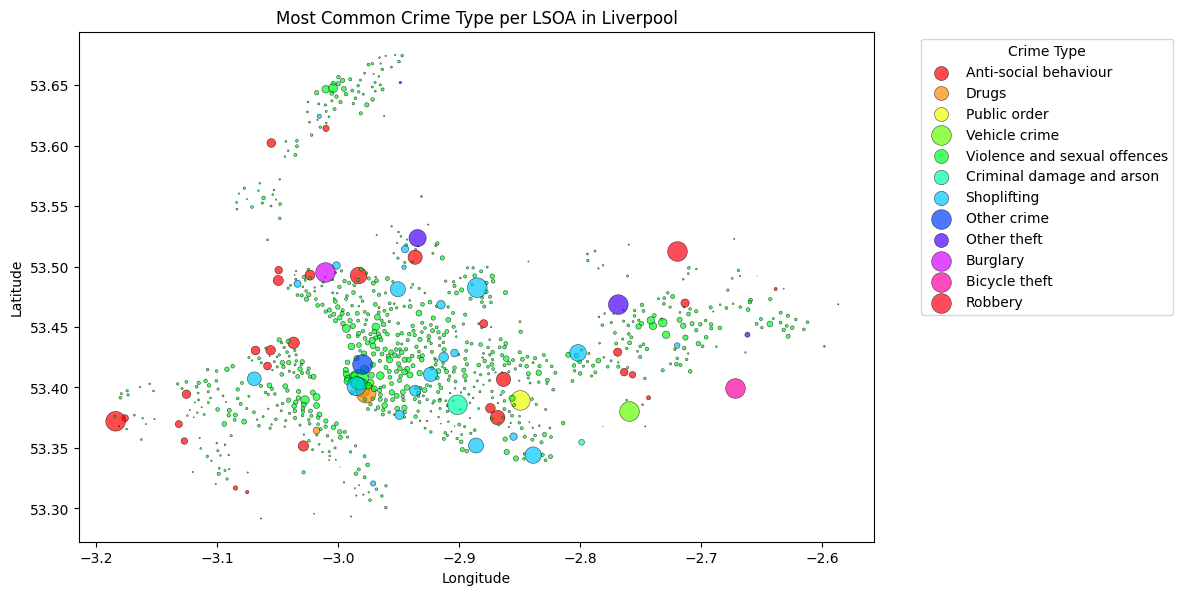

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint

# Load your cleaned crime data
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Convert to GeoDataFrame with Point geometry
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# 1. Find the most common crime type per LSOA
most_common_crime = (
    gdf.groupby(['lsoa_name', 'crime_type'])
    .size()
    .reset_index(name='count')
    .sort_values(['lsoa_name', 'count'], ascending=[True, False])
    .drop_duplicates(subset=['lsoa_name'])
    .reset_index(drop=True)
)

# 2. Calculate total crimes per LSOA (for sizing points later)
lsoa_counts = gdf.groupby('lsoa_name').size().reset_index(name='total_crimes')

# 3. Calculate centroid of points per LSOA
lsoa_centroids = gdf.groupby('lsoa_name')['geometry'].apply(lambda x: MultiPoint(x).centroid).reset_index()

# 4. Merge all data into one DataFrame
lsoa_summary = most_common_crime.merge(lsoa_counts, on='lsoa_name').merge(lsoa_centroids, on='lsoa_name')

# 5. Convert to GeoDataFrame for plotting
lsoa_summary_gdf = gpd.GeoDataFrame(lsoa_summary, geometry='geometry')

# 6. Setup color map for crime types
crime_types = lsoa_summary_gdf['crime_type'].unique()
colors = plt.cm.get_cmap('hsv', len(crime_types))
color_dict = {crime: colors(i) for i, crime in enumerate(crime_types)}

# 7. Plotting
plt.figure(figsize=(12, 12))
ax = plt.gca()

# Plot each LSOA centroid, colored by most common crime type, sized by total crimes
for crime in crime_types:
    subset = lsoa_summary_gdf[lsoa_summary_gdf['crime_type'] == crime]
    subset.plot(
        ax=ax,
        marker='o',
        color=color_dict[crime],
        markersize=subset['total_crimes'] / subset['total_crimes'].max() * 200,  # Scale size
        label=crime,
        alpha=0.7,
        edgecolor='k',
        linewidth=0.4,
    )

plt.title('Most Common Crime Type per LSOA in Liverpool')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/liverpool_crime_type_map.png', dpi=300, bbox_inches='tight')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jamesjackson/Documents/liverpool_crime_analysis/outputs/crime_density_hexbin.png'

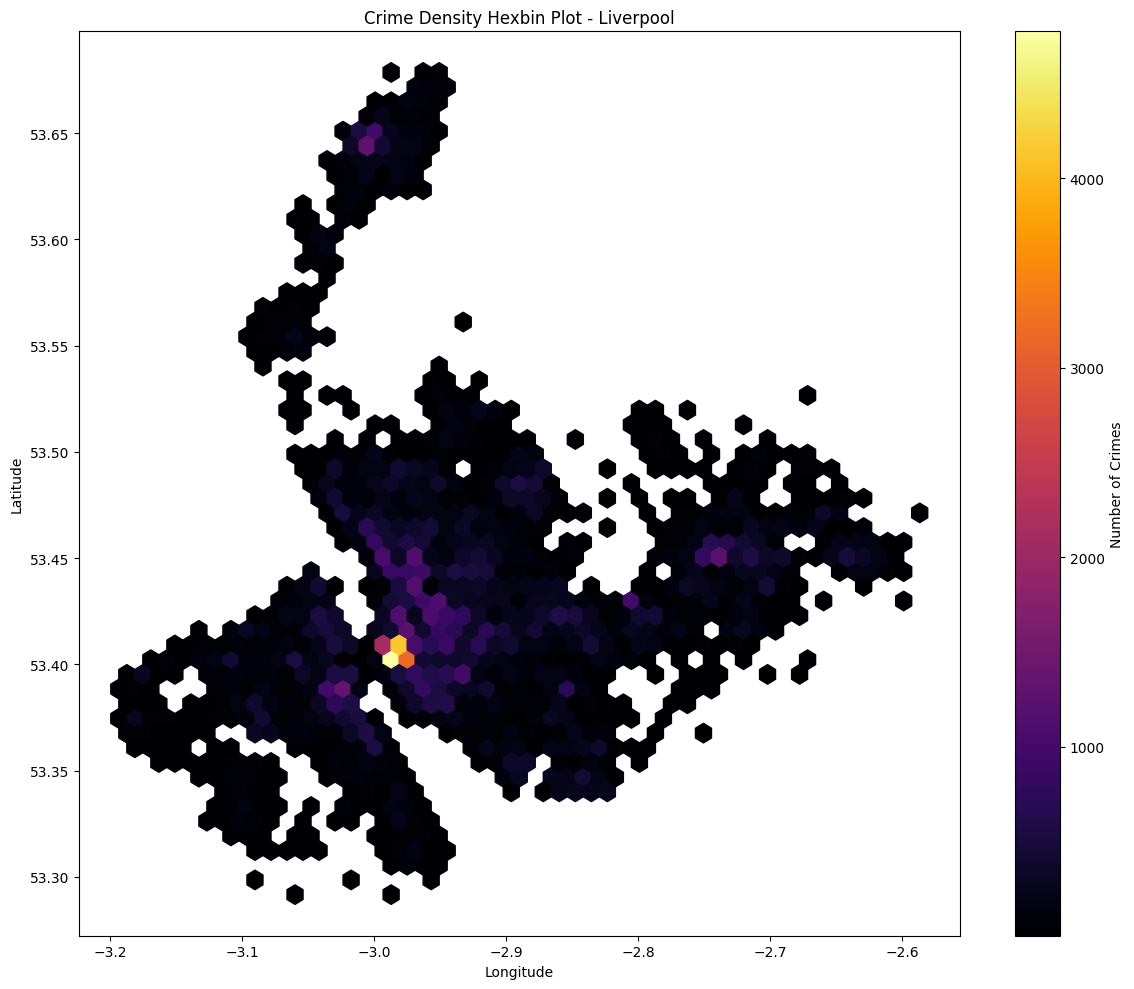

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Load your cleaned crime data
df = pd.read_csv('/Users/jamesjackson/Documents/liverpool_crime_analysis/csv_files/clean_data_final.csv')

# Convert to GeoDataFrame (optional for this plot, but keeping for consistency)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# HEXBIN plot
plt.figure(figsize=(12, 10))
plt.hexbin(gdf['longitude'], gdf['latitude'], gridsize=50, cmap='inferno', mincnt=1)
plt.colorbar(label='Number of Crimes')
plt.title('Crime Density Hexbin Plot - Liverpool')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/outputs/crime_density_hexbin.png')
plt.show()

# KDE plot
plt.figure(figsize=(12, 10))
sns.kdeplot(
    x=gdf['longitude'], y=gdf['latitude'],
    cmap='inferno', fill=True, thresh=0, levels=100
)
plt.title('Crime Density KDE Plot - Liverpool')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/crime_density_kde.png')
plt.show()


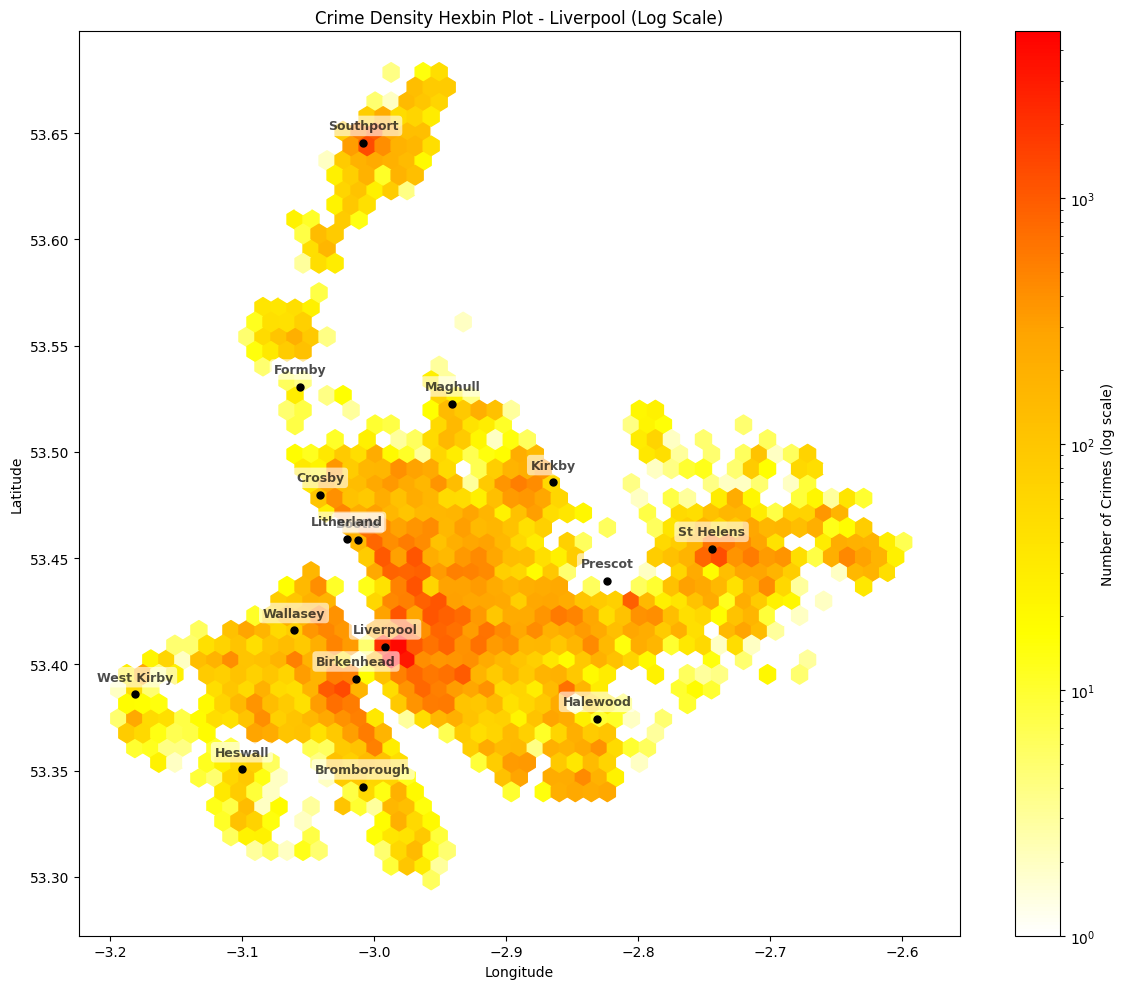

In [43]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

# Place names and coordinates (latitude, longitude), without Widnes and Runcorn
places = {
    'Liverpool': (53.4084, -2.9916),
    'West Kirby': (53.3859, -3.1808),
    'Birkenhead': (53.3933, -3.0136),
    'Wallasey': (53.4161, -3.0606),
    'Heswall': (53.3506, -3.1001),
    'Bromborough': (53.3425, -3.0082),
    'Halewood': (53.3743, -2.8311),
    'Prescot': (53.4394, -2.8234),
    'St Helens': (53.4543, -2.7443),
    'Bootle': (53.4584, -3.0121),
    'Litherland': (53.4590, -3.0208),
    'Crosby': (53.4797, -3.0407),
    'Kirkby': (53.4857, -2.8642),
    'Maghull': (53.5227, -2.9406),
    'Formby': (53.5307, -3.0562),
    'Southport': (53.6453, -3.0081)
}

# Custom colormap white → yellow → orange → red
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_heatmap',
    ['#ffffff', '#ffff00', '#ffa500', '#ff0000']  # white, yellow, orange, red
)

plt.figure(figsize=(12, 10))
plt.hexbin(
    gdf['longitude'], gdf['latitude'],
    gridsize=50,
    cmap=custom_cmap,
    norm=colors.LogNorm(),  # Logarithmic scale
    mincnt=1
)
plt.colorbar(label='Number of Crimes (log scale)')
plt.title('Crime Density Hexbin Plot - Liverpool (Log Scale)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for place, (lat, lon) in places.items():
    plt.plot(lon, lat, 'ko', markersize=5)  # black dot
    plt.text(lon, lat + 0.005, place, fontsize=9, fontweight='bold', color='black',
             ha='center', va='bottom', alpha=0.7,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.3'))
plt.tight_layout()
plt.savefig('/Users/jamesjackson/Documents/liverpool_crime_analysis/crime_density_hexbin_plot.png')
plt.show()
